In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(tidymodels): there is no package called ‘tidymodels’


<h1>Data Science Project: Planning Stage (Individual) </h1>

<h2> Data Description players.csv </h2>	

I am going to start off by describing the players.csv dataset. To do this this I will first load the dataset.


In [34]:
players = read_csv('data/players.csv')

players_shape = dim(players)
print(players_shape)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196   7


The dataset has got **196** observations and **7** variables as shown above.  

In [27]:
var_names = colnames(players)
var_names

head(players)

[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


<Br>

### Data Overview of players.csv 

The dataset contains the following columns: `experience`, `subscribe`, `hashedEmail`, `played_hours`, `name`, `gender`, and `Age`.

- **experience** is a categorical variable representing the player's experience level.  
- **subscribe** is a binary categorical variable indicating whether a player has subscribed to the game newsletter.
- **played_hours** is a continuous numeric variable representing the total number of hours a player has played.
- **Age** is a discrete numeric variable representing the player's age in years.  
- **gender** is a categorical variable representing how players choose to identify.  
- **hashedEmail** and **name** are categorical variables that label each player to help identify them.


<Br>

In [29]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [33]:
# Getting the number of occurences of each category in experience column
exp_cat_nos = players |>
    group_by(experience) |>
    summarise(count = n())

# Getting the number of occurences of each category in gender column 
gender_cat_nos = players |>
    group_by(gender) |>
    summarise(count = n())

print(exp_cat_nos)
print(gender_cat_nos)

# A tibble: 5 × 2
  experience count
  <chr>      <int>
1 Amateur       63
2 Beginner      35
3 Pro           14
4 Regular       36
5 Veteran       48
# A tibble: 7 × 2
  gender            count
  <chr>             <int>
1 Agender               2
2 Female               37
3 Male                124
4 Non-binary           15
5 Other                 1
6 Prefer not to say    11
7 Two-Spirited          6


<Br>

### Summary Statistics of players.csv

- `experience` does not have any missing values and it has five different unique categories including `Amateur`, `Beginner` <Br>
  `Pro`, `Regular` and `Veteran`.
- `subscribe` has 52 FALSE values and 144 TRUE values. It has no missing values.
- `HashedEmail` does not have any missing values.
- `played_hours` has a mean of 5.85 hours, a lower quartile of 0.00 hours, a median of 19.00 hours, an upper quartile of 0.60 hours, a minimum of 0.00 hours and a maximum of 223.10 hours. It has no missing values.
- `name` does not have any missing values.
- `gender` has 7 unique categories in this data set and no missing vaues.
- `Age` has a mean of 21.14 years, a lower quartile of 17.00 years, a median of 19.00 years, an upper quartile of 22.75 years, a minimum of 9.00 years and a maximum of 58.00 years. It has 2 missing values.




<Br>

### Potential Issues with the Data that are not Immediately Visible

The `subscribe` variable has a significant class imbalance, with only **52** FALSE values compared to **144** TRUE values. Since `subscribe` is a logical variable, it can take only two possible discreet values, which makes predicting it a classification problem. 

Class imbalance can be an issue for K-Nearest Neighbours (KNN), because a model may achieve a high overall accuracy by mostly predicting the majority class (TRUE) while failing to correctly classify the minority class (FALSE). If correctly identifying the FALSE class is important, metrics like recall for the minority class should also be considered rather than just the overall accuracy. 

To address this imbalance I could apply weights to balance the classes and ensure that they are both equally represented.


<Br>

### Visible Potential Issues with the Data

The data is tidy and does not have any other issues. <Br>
<Br> 
I think that the dataset is tidy because: 

- Each variable has its own column.
- Each observation has its own row.
- Each value has its own cell.

<Br>

<h2> Data Description sessions.csv </h2>	

Next I am going to analyse sessions.csv. To do this I will first load the dataset

In [35]:
sessions = read_csv('data/sessions.csv')

sessions_shape = dim(sessions)
print(sessions_shape)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1535    5


The dataset has got **1535** observations and **5** variables as shown above.  

In [36]:
var_names = colnames(sessions)
var_names

head(sessions)

[1] "hashedEmail"         "start_time"          "end_time"           
[4] "original_start_time" "original_end_time"

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


<Br>

### Data Overview of sessions.csv 

The dataset contains the following columns: `hashedEmail`, `start_time`, `end_time`, `original_start_time` and `original_end_time`

- **hashedEmail** is a categorical variable that labels each player to help identify them.
- **start_time** is a categorical variable representing the date and time at which the player started their gaming session.  
- **end_time** is a categorical variable representing the date and time at which the player ended their gaming session. 
- **original_start_time** is a continuous numeric variable.
- **original_end_time** is a continuous numeric variable.


Upon further research I have found that **original_start_time** and **original_end_time** seem to represent time using the Unix time convention.

"Unix time is a method to represent a timestamp, and is usually defined as the number of seconds since the beginning of the Unix epoch, which is January 1st, 1970, at midnight (UTC). Leap seconds are ignored."

Source : [MDN Web Docs, 2025](https://developer.mozilla.org/en-US/docs/Glossary/Unix_time)

<Br>

In [49]:
summary(sessions)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

<Br>

### Summary Statistics of players.csv

- `hashedEmail` does not have any missing values.
- `start_time` does not have any missing values.
- `end_time` does not have any missing values.
- `original_start_time` has a mean of 1.72e+12 seconds, a lower quartile of 1.72e+12 seconds, a median of 1.72e+12 seconds, an upper quartile of 1.72e+12 seconds, a minimum of 1.71e+12 seconds and a maximum of 1.73e+12 seconds. It has no missing values.
- `original_end_time` has a mean of 1.72e+12 seconds, a lower quartile of 1.72e+12 seconds, a median of 1.72e+12 seconds, an upper quartile of 1.71e+12 seconds, a minimum of 1.72e+12 seconds and a maximum of 1.73e+12 seconds. It also has 2 missing values.

In [55]:
# Checking the proportion of times original_start_time and original_end_time are always equal. 
# From looking at the dataset they appear to be. Maybe there is a data collection issue.
equal_original_start_end = sessions |>
    filter(original_start_time == original_end_time) |> 
    nrow()

equal_original_start_end/nrow(sessions)

[1] 0.7192182

<Br>

### Potential Issues with the Data that are not Immediately Visible


The variables `original_start_time` and `original_end_time` appear to have the same values 72% of the time, especially for players with very short session durations. This means that if the start and end times are close together, both columns will contain nearly identical values. There seems to be an issue with the data collection or representation here because for observations where start_time and end_time values are different, the original_start_time and original_end_time is the same. 

If we were to use either of these columns as target variables, this could cause issues. Since both of the columns are numeric, this would be a regression problem. However, the two columns have a very high correlation. As a result, using one to predict the other, with a linear regression model, would not give us any useful information, because the model would just reproduce the other column’s values. This is because the model would likely have a high learned coefficient associated with one of the columns when predicting the other. 

Furthermore, these timestamps are difficult to interpret in their current form because of their units. Looking at the data without any explanations, it is difficult to tell what exactly those two columns represent. Hence these variables do not offer much useful information for prediction or analysis and if I choose to use this dataset I will most likely not include these columns.

<Br>

### Visible Potential Issues with the Data

The data is messy and would need to be tidied up. <Br>
<Br> 
I think that the dataset is messy because: 

- Each variable does not have its own column (Date is a present variable that does not have its own column, it has been combined within start_time and end_time).
- Each value does not have its own cell (all observations have date and time as one value for the start_time and end_time columns).

<Br>

<h2> Questions </h2>	

For my project, I have decided to answer the broad question 1 provided to us in the project description <Br>
**"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"** <Br>

The specific question that I have formulated is: <Br>
**Can a player’s experience level, age, gender, and total hours played be used to predict whether they will subscribe to the game’s newsletter?**


<Br>

### How the Data Will Help Me Address the Question

- I am planning on using the `players.csv` file.  
- The predictor variables that I will use are `experience`, `played_hours`, `gender`, and `age`.  
- I am leaving out the `name` and `hashedEmail` columns because those are unique player identifiers, and I don't believe they can provide useful information since they are arbitrary.  
- My target variable will be `subscribe`.  
- I am not going to tidy any of the data because it is already in a tidy format.  
- Since this is a classification problem, I am going to create and tune a K-Nearest Neighbours (KNN) model.  
- I will scale the data to ensure that all predictor variables have the same mean and standard deviation. This will ensure that all my features are considered equally when training the model and while making predictions.  


<Br>

<h2> Exploratory Data Analysis and Visualization </h2>	

- The dataset that I am using is players.csv. I have loaded it into R above in my report's data description phase. 
- As explained above, the data in players.csv is tidy and does not need any wrangling for that purpose.


In [70]:
# computing the mean and converting into vectors 
played_hrs_mean = c(mean(players[["played_hours"]], na.rm=TRUE))
age_mean = c(mean(players[["Age"]], na.rm=TRUE))

# turning the vectors into tibbles
mean_summary = tibble(played_hrs_mean, age_mean)
mean_summary 

played_hrs_mean,age_mean
<dbl>,<dbl>
5.845918,21.13918


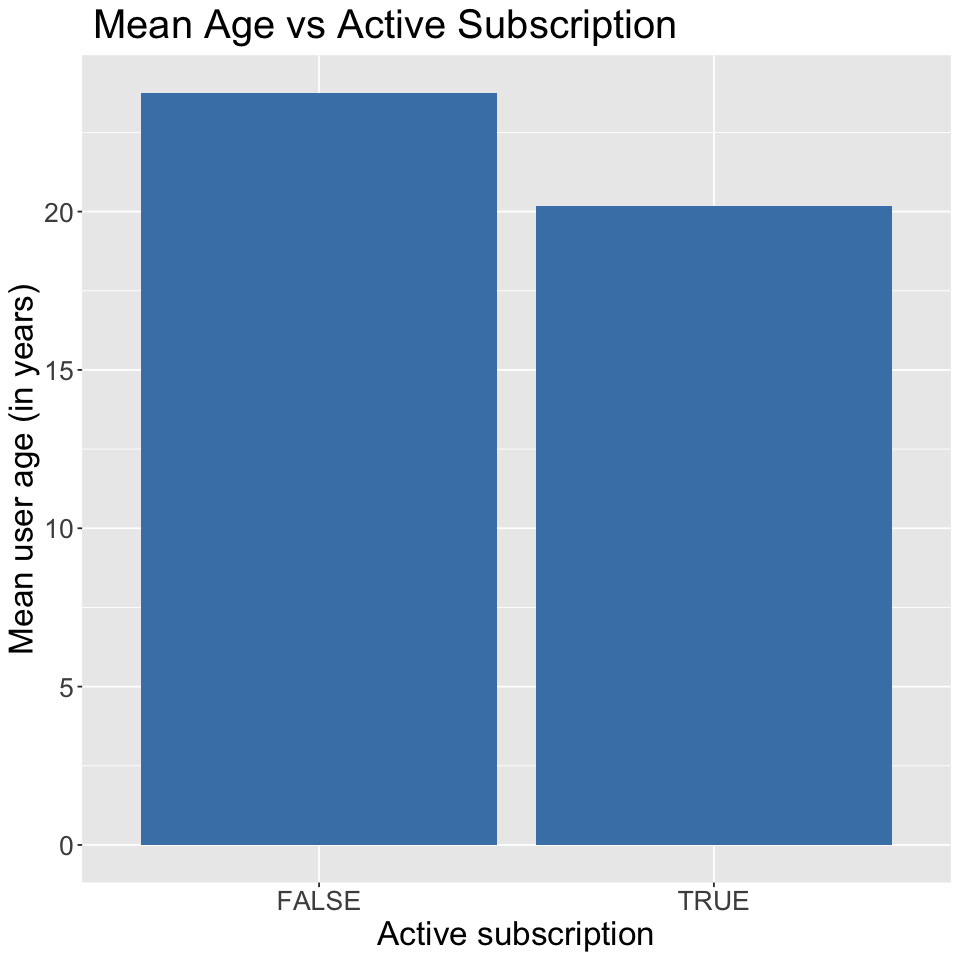

In [103]:
options(repr.plot.width = 8, repr.plot.height = 8)

# summarizing mean age and grouping by subscription
age_summary <- players |>
  group_by(subscribe) |>
  summarise(mean_age = mean(Age, na.rm = TRUE))

#making a bar plot of Mean Age on y axis and subscription status on the x axis
age_sub_plot = age_summary |>
      ggplot(aes(x = subscribe, y = mean_age)) + 
      geom_bar(stat="identity", fill="steel blue") + 
      labs(y = "Mean user age (in years)", x = "Active subscription",title = " Mean Age vs Active Subscription") +
      theme(text = element_text(size = 20))

age_sub_plot


The plot above shows us that the mean age of users that do have a subscription seems to be lower than the mean age of the users that do not have a subscription. <Br> 

This could imply that users that are of a younger age would be more likely to subsribe.

<Br>

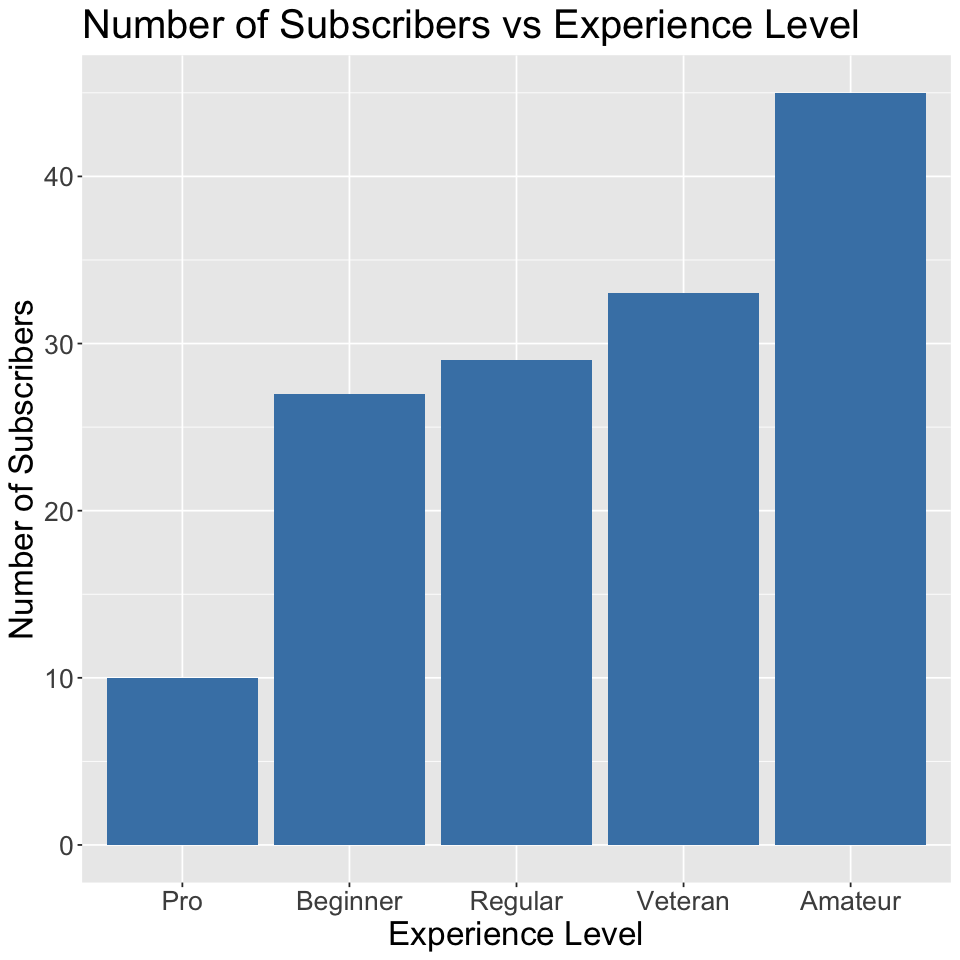

In [108]:
options(repr.plot.width = 8, repr.plot.height = 8)

# summarizing subscription count and grouping by experience level 
# I want to see if a certain level of experienced player is more likely to have a subscription
subscription_summary <- players |>
      filter(subscribe == TRUE) |>
      count(experience, name = "sub_count")

#making a bar plot of experience level on x axis and number of subscriber on the y axis
subscription_plot <- subscription_summary |>
  ggplot(aes(x = reorder(experience, sub_count), y = sub_count)) + 
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(y = "Number of Subscribers", x = "Experience Level", title = "Number of Subscribers vs Experience Level") +
  theme(text = element_text(size = 20))

subscription_plot

As displayed by the plot above, pro players tend to not subscribe to the newsletter much, while amateur players tend to subscribe to the newsletter most.<Br>

This could imply that users that are pros are less likely to subscribe while users that are amateurs are more likely to subscribe. 

<Br>


## Methods and Plans

### Proposed Method: K-Nearest Neighbours (KNN)

**Reason for Choosing KNN**  
- I am choosing KNN for this problem because the target variable is discrete, making it a classification task.  
- Additionally, KNN does not assume a specific shape for the data. This makes the model suitable even if the data is not linearly separable.  

**Assumptions**  
- KNN does not make any assumptions about the shape of the data.  
- However, for the model to perform well, the features need to be on the same scale, as we want to consider all predictors equally when making predictions. This is important because KNN uses distance calculations to determine similarity between data points.  
- To standardize the data, I will scale features to have a mean of 0 and a standard deviation of 1.  

**Potential Limitations**  
- KNN does not perform well when there are many features, but in this case, only four predictors are used, so this should not affect the model.  
- KNN is affected by class imbalance, which can cause the model to predict the majority class most of the time. To address this issue, I will balance the class weights of the target variable (`subscribe`).  
- Choosing an inappropriate value of K can also be a limitation. If K is too small, the model will overfit the training set, but if K is too large, the model can underfit. To avoid this, I will carry out hyperparameter tuning.  

**Model Comparison and Selection**  
- I will select the model that gives the best accuracy score after balancing the class weights. This will eliminate the need to tune the model solely to achieve a higher recall score on the FALSE class.  
- I will use 5-fold cross-validation on the training set.  

**Data Processing and Splitting**  
- I will first drop any features that are not required from the dataset.  
- Then, I will split the dataset into a training set containing 75% of the data and a test set containing the remaining 25%. I think this is a good proportion since the dataset is large.  
- I will specify strata = subscribe when splitting the data.  
- I will standardize the predictor columns in the recipe that I make.  
- I will perform cross-validation on the training set to tune the value of K on my model specification.
- Once I am satisfied with the value of K, I will evaluate my model on the test set by predicting on it and calculating its accuracy.  


<Br>